# The restoration of blurry images

- Load image blur259x185L.dat   : g(x,y) without noise
- Load image blur259x185L_N.dat : g(x,y) with noise
- kernL64_f4.dat : h(x) 64values float(4bytes)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from lib.helpersmd import readFromDat
%matplotlib inline

In [2]:
g_without_noise=readFromDat('data/blur259x185L.dat',np.float32)
g_with_noise=readFromDat('data/blur259x185L_N.dat',np.float32)
h=readFromDat('data/kernL64_f4.dat',np.float32)
new_h=np.zeros_like(g_without_noise)
new_h[:64]=h
h=new_h

$f^{\^}(x)=F^{-1}[\dfrac{G(x)}{H(x)}]$


In [3]:
G__without_noise=np.fft.fft(g_without_noise)
H=np.fft.fft(h)

In [4]:
F=G__without_noise/H
ifft=np.fft.ifft(F)
f=np.sqrt(np.power(np.real(ifft),2)+np.power(np.imag(ifft),2))

In [5]:
img=f.reshape(185,259)[::-1,:]

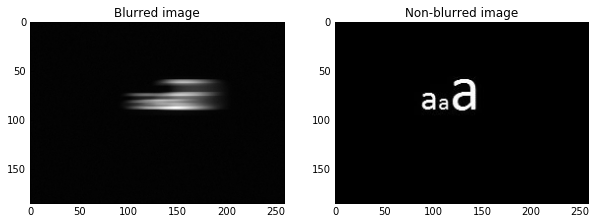

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Blurred image')
imshow(g_with_noise.reshape(185,259)[::-1,:],cmap='gray')
plt.subplot(1,2,2)
plt.title('Non-blurred image')
imshow(img,cmap='gray')

$f^{\^}(x)=F^{-1}[\dfrac{G(x).H^*(x)}{H^2(x)+a^2}]$  с шумом

In [7]:
H_star=np.conjugate(H)
G_noise=np.fft.fft(g_with_noise)

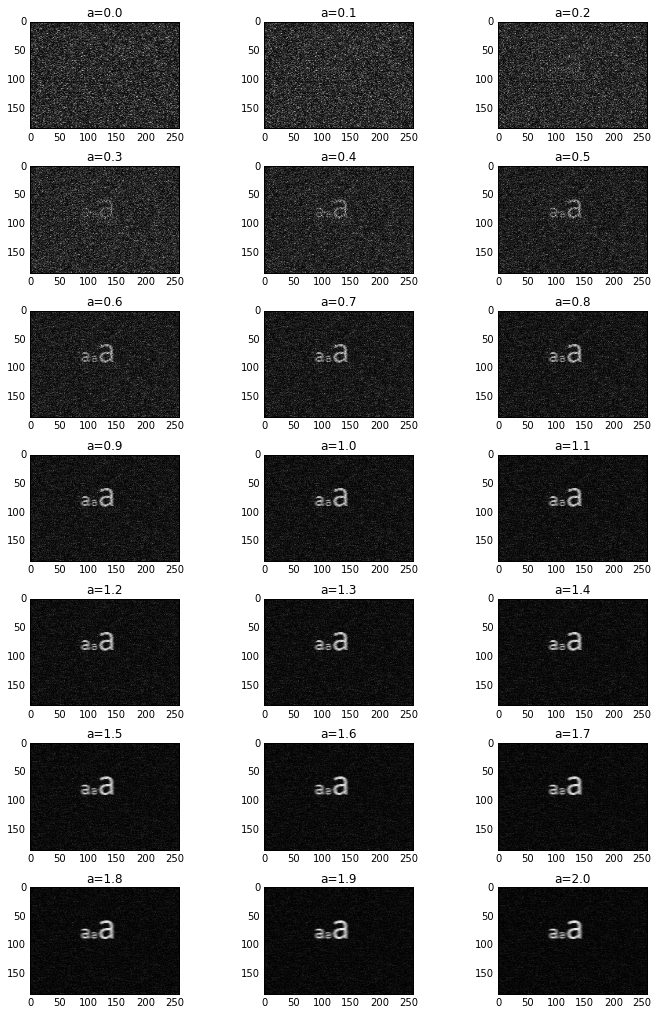

In [8]:
plt.figure(figsize=(10,20))
fig=0
for a in np.arange(0,2.1,.1):
    F2=np.multiply(G_noise,H_star)/(np.power(np.abs(H),2)+a**2)
    ifft2=np.fft.ifft(F2)
    f2=np.sqrt(np.power(np.real(ifft2),2)+np.power(np.imag(ifft2),2))
    f2=f2.reshape(185,259)[::-1,:]
    fig=fig+1
    plt.subplot(10,3,fig)
    plt.title("a={}".format(a))
    imshow(f2,cmap='gray')
plt.tight_layout()